In [2]:
#yfinance is a popular Python library used for downloading historical market data from Yahoo Finance.
#It simplifies the process of accessing financial data for various securities, including stocks, commodities, cryptocurrencies, and more

#!pip install yfinance

In [3]:
import seaborn as sns
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
#from sklearn import metrics
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
#The code fetches historical price data for Bitcoin, Ethereum, Tether, and Binance Coin for the past 5 years and keeps only the Close and Volume columns for each of these cryptocurrencies.
#This cleaned data can then be used for further analysis or machine learning tasks, such as predicting future prices.


btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [6]:
#The parameters lsuffix and rsuffix in the join method are used to add suffixes to overlapping column names when joining two DataFrames
# This is necessary to avoid column name conflicts when the two DataFrames have columns with the same name.

p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [7]:
data.head()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2021-01-07 00:00:00+00:00,39371.042969,84762141031,1225.678101,40468027280,1.000400,129467601516,43.449490,829964770
2021-01-08 00:00:00+00:00,40797.609375,88107519480,1224.197144,44334826666,1.000045,131555961745,42.395317,650561500
2021-01-09 00:00:00+00:00,40254.546875,61984162837,1281.077271,33233105361,1.002947,103292241007,43.932854,590039660
2021-01-10 00:00:00+00:00,38356.441406,79980747690,1262.246704,40616938053,1.000223,135437984723,42.448475,701488832
2021-01-11 00:00:00+00:00,35566.656250,123320567399,1090.145386,60733630300,1.000587,180779058885,38.371361,890728694


In [8]:
data.tail()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2026-01-03 00:00:00+00:00,90603.187500,20774828592,3125.917480,11460707919,0.999635,55660104876,878.639465,1660447864
2026-01-04 00:00:00+00:00,91413.492188,26770491368,3140.710449,13890479323,0.999506,66989138853,894.383667,1869811425
2026-01-05 00:00:00+00:00,93882.554688,53376407252,3226.130371,27211995956,0.999919,109110758515,910.788391,2191450063
2026-01-06 00:00:00+00:00,93729.031250,52430605257,3295.946777,27853981622,0.999542,110866357823,917.507263,2396005647
2026-01-07 00:00:00+00:00,92004.109375,56147517440,3209.100098,27961473024,0.999283,109816897536,903.722473,2654457600


In [7]:
data.shape

(1828, 8)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1827 entries, 2021-01-07 00:00:00+00:00 to 2026-01-07 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1827 non-null   float64
 1   Volume (BTC)   1827 non-null   int64  
 2   Close (ETH)    1827 non-null   float64
 3   Volume (ETH)   1827 non-null   int64  
 4   Close (USDT)   1827 non-null   float64
 5   Volume (USDT)  1827 non-null   int64  
 6   Close (BNB)    1827 non-null   float64
 7   Volume (BNB)   1827 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 128.5 KB


In [10]:
data.isna().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [12]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03,1827.000000,1.827000e+03
mean,54639.169968,3.708053e+10,2542.324227,1.948530e+10,1.000142,7.088367e+10,460.004897,1.850138e+09
std,29518.155273,2.298081e+10,907.640963,1.288539e+10,0.000708,4.501361e+10,221.052959,1.475592e+09
min,15787.284180,5.331173e+09,993.636780,2.081626e+09,0.995872,9.989859e+09,38.111610,2.038465e+08
25%,29412.204102,2.130695e+10,1795.429626,1.025234e+10,0.999893,4.011224e+10,288.090088,8.869756e+08
50%,46707.015625,3.175896e+10,2460.679199,1.643428e+10,1.000140,6.038998e+10,402.502655,1.602303e+09
75%,69378.554688,4.708497e+10,3236.595581,2.502669e+10,1.000382,8.808248e+10,600.466431,2.207780e+09
max,124752.531250,3.509679e+11,4831.348633,9.773662e+10,1.011530,3.443980e+11,1310.214355,1.798295e+10


#Exploratory Data Analysis

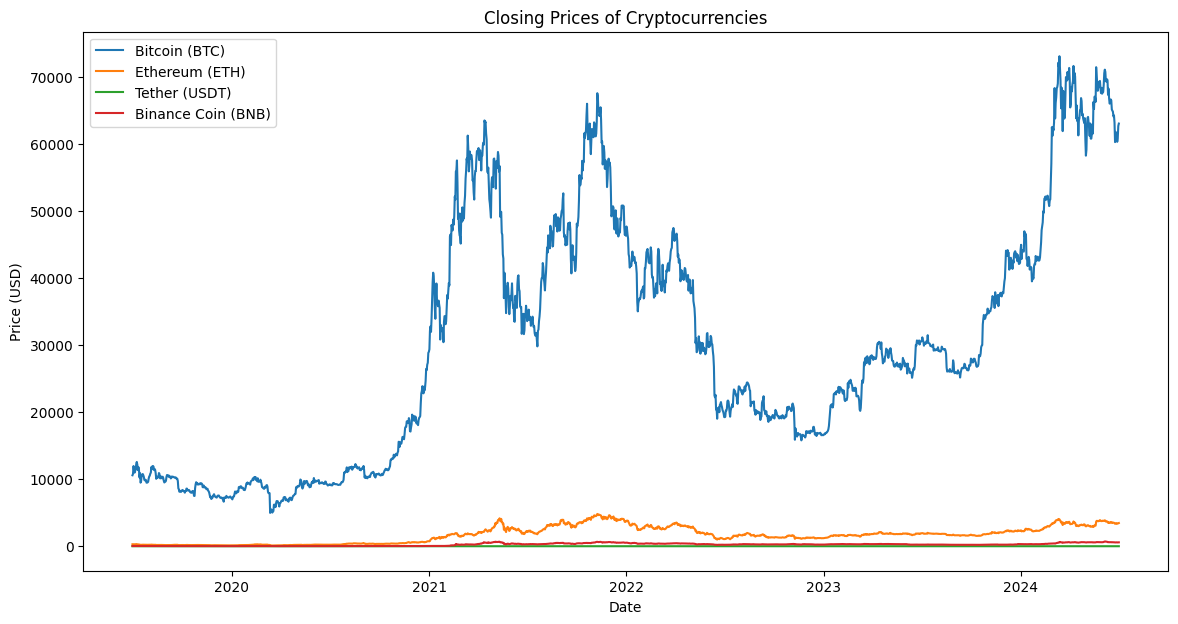

In [11]:
#Visualize the Closing Prices
# create a line plot to visualize the closing prices of all four cryptocurrencies over time:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Close (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Close (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Close (BNB)'], label='Binance Coin (BNB)')
plt.title('Closing Prices of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


<Axes: xlabel='Date'>

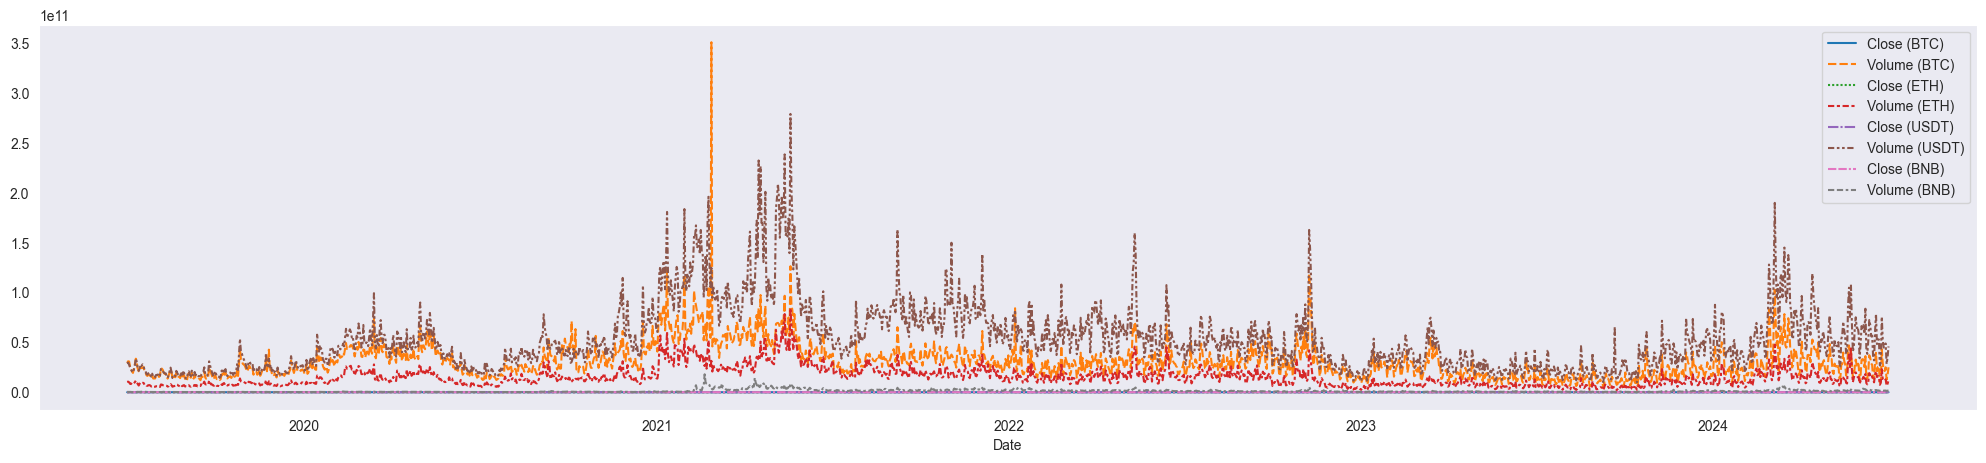

In [12]:
plt.figure(figsize = (25, 5))
sns.set_style('dark')
sns.lineplot(data=data)

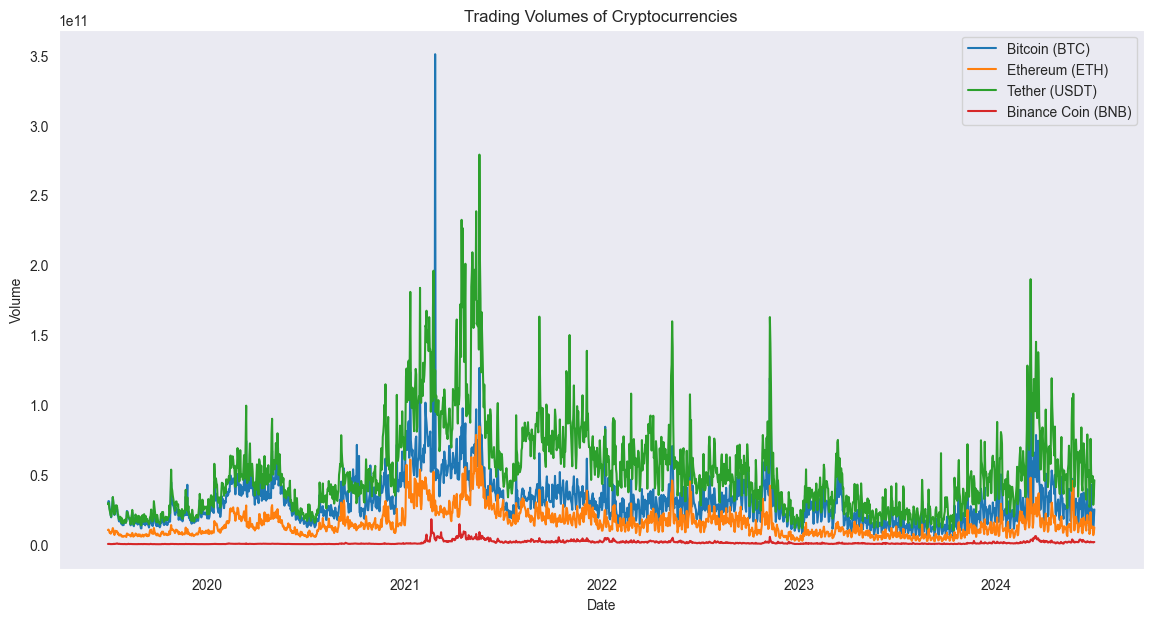

In [13]:
# Visualize the Trading Volumes
#Let's visualize the trading volumes of all four cryptocurrencies:
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume (BTC)'], label='Bitcoin (BTC)')
plt.plot(data.index, data['Volume (ETH)'], label='Ethereum (ETH)')
plt.plot(data.index, data['Volume (USDT)'], label='Tether (USDT)')
plt.plot(data.index, data['Volume (BNB)'], label='Binance Coin (BNB)')
plt.title('Trading Volumes of Cryptocurrencies')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()


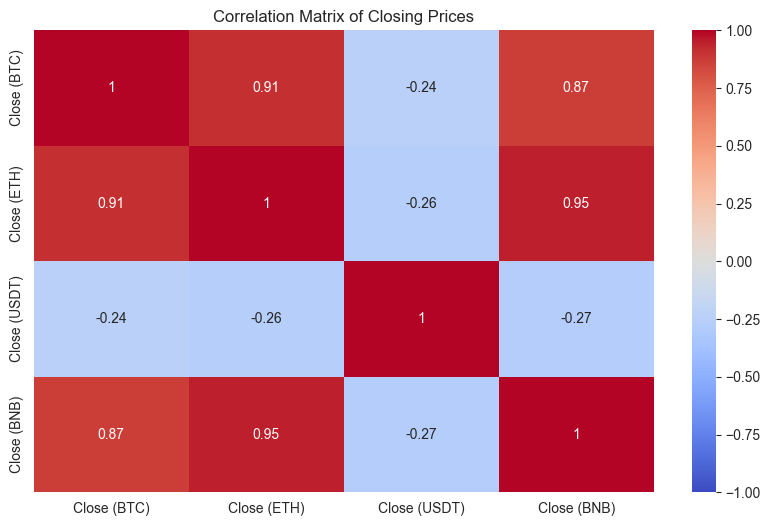

In [14]:
 #Correlation Analysis
#We'll analyze the correlation between the closing prices of the cryptocurrencies:
# Calculate the correlation matrix
corr_matrix = data[['Close (BTC)', 'Close (ETH)', 'Close (USDT)', 'Close (BNB)']].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


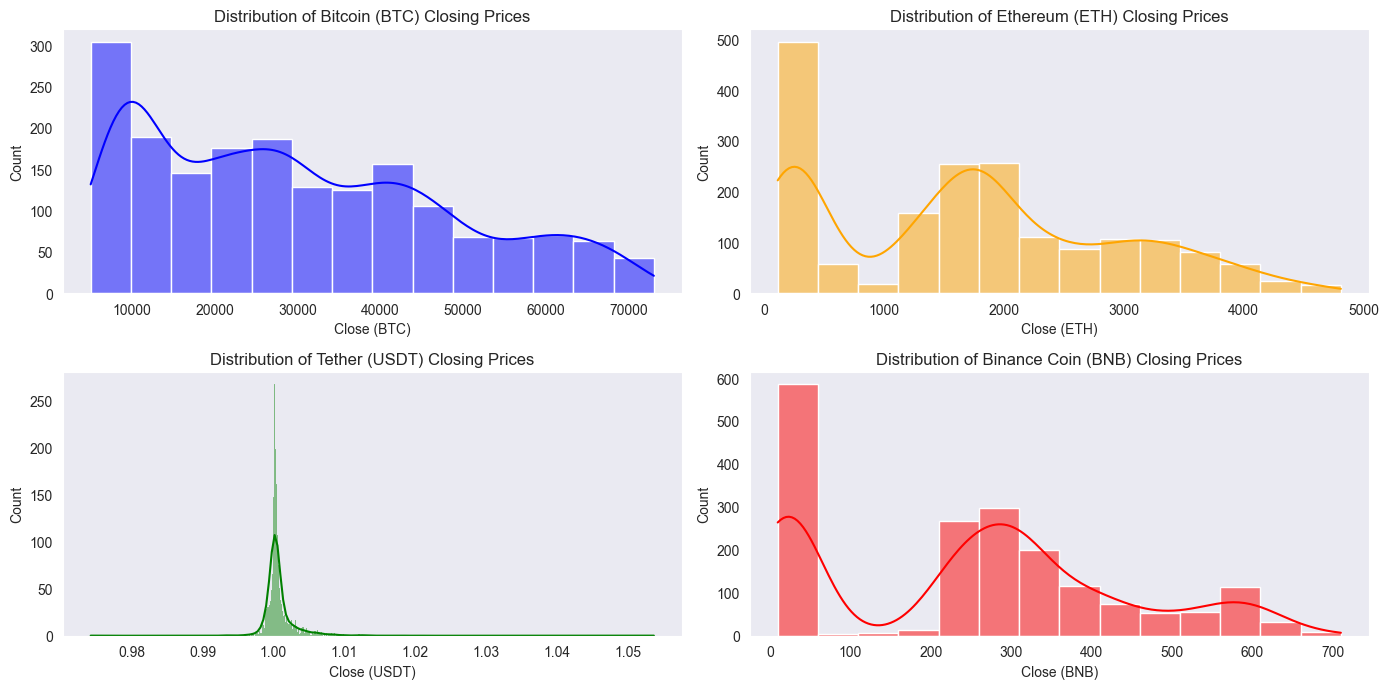

In [15]:
# Distribution of Closing Prices
#Let's plot the distribution of closing prices for each cryptocurrency:
plt.figure(figsize=(14, 7))

plt.subplot(2, 2, 1)
sns.histplot(data['Close (BTC)'], kde=True, color='blue')
plt.title('Distribution of Bitcoin (BTC) Closing Prices')

plt.subplot(2, 2, 2)
sns.histplot(data['Close (ETH)'], kde=True, color='orange')
plt.title('Distribution of Ethereum (ETH) Closing Prices')

plt.subplot(2, 2, 3)
sns.histplot(data['Close (USDT)'], kde=True, color='green')
plt.title('Distribution of Tether (USDT) Closing Prices')

plt.subplot(2, 2, 4)
sns.histplot(data['Close (BNB)'], kde=True, color='red')
plt.title('Distribution of Binance Coin (BNB) Closing Prices')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'Close (BTC)'}>,
        <Axes: title={'center': 'Volume (BTC)'}>,
        <Axes: title={'center': 'Close (ETH)'}>,
        <Axes: title={'center': 'Volume (ETH)'}>],
       [<Axes: title={'center': 'Close (USDT)'}>,
        <Axes: title={'center': 'Volume (USDT)'}>,
        <Axes: title={'center': 'Close (BNB)'}>,
        <Axes: title={'center': 'Volume (BNB)'}>]], dtype=object)

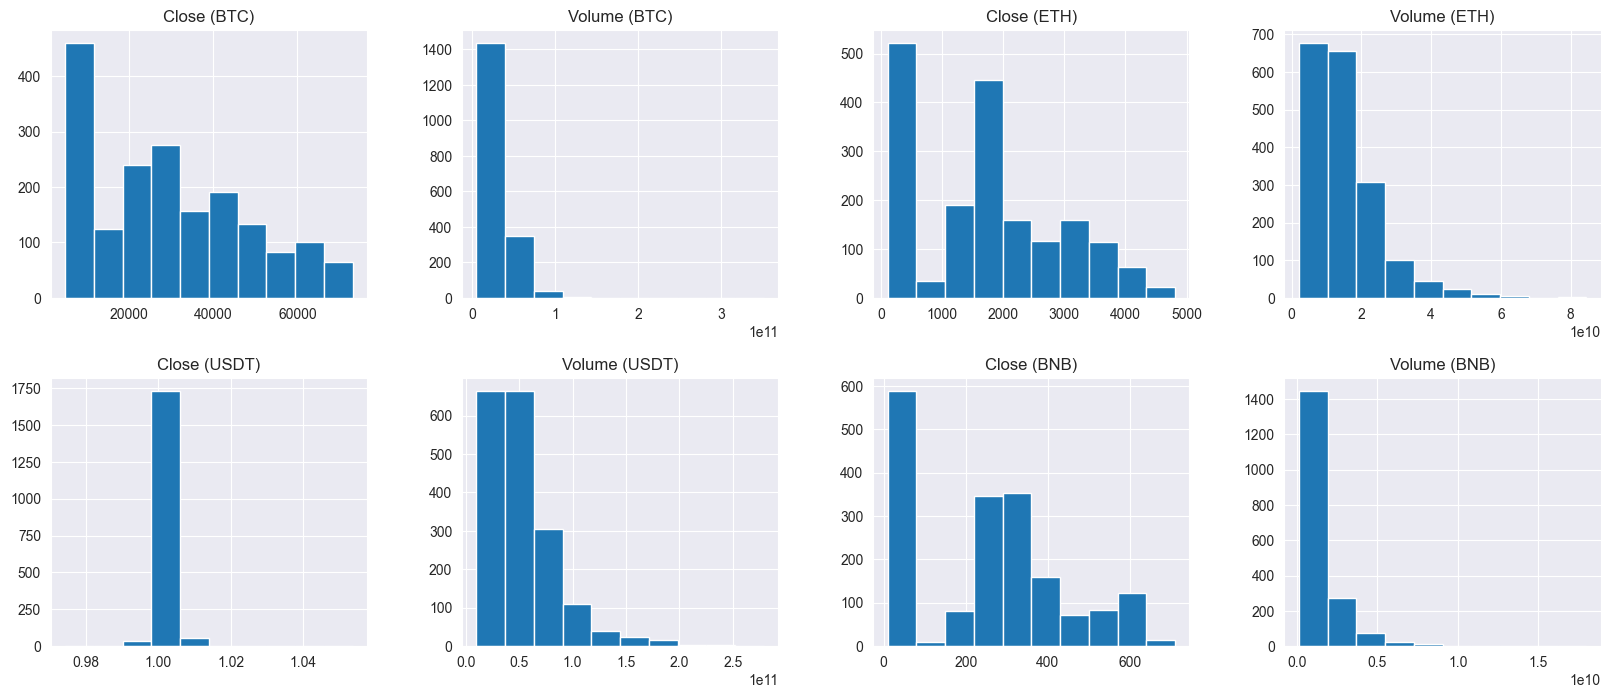

In [16]:
data.hist(figsize=(20, 8), layout=(2, 4))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

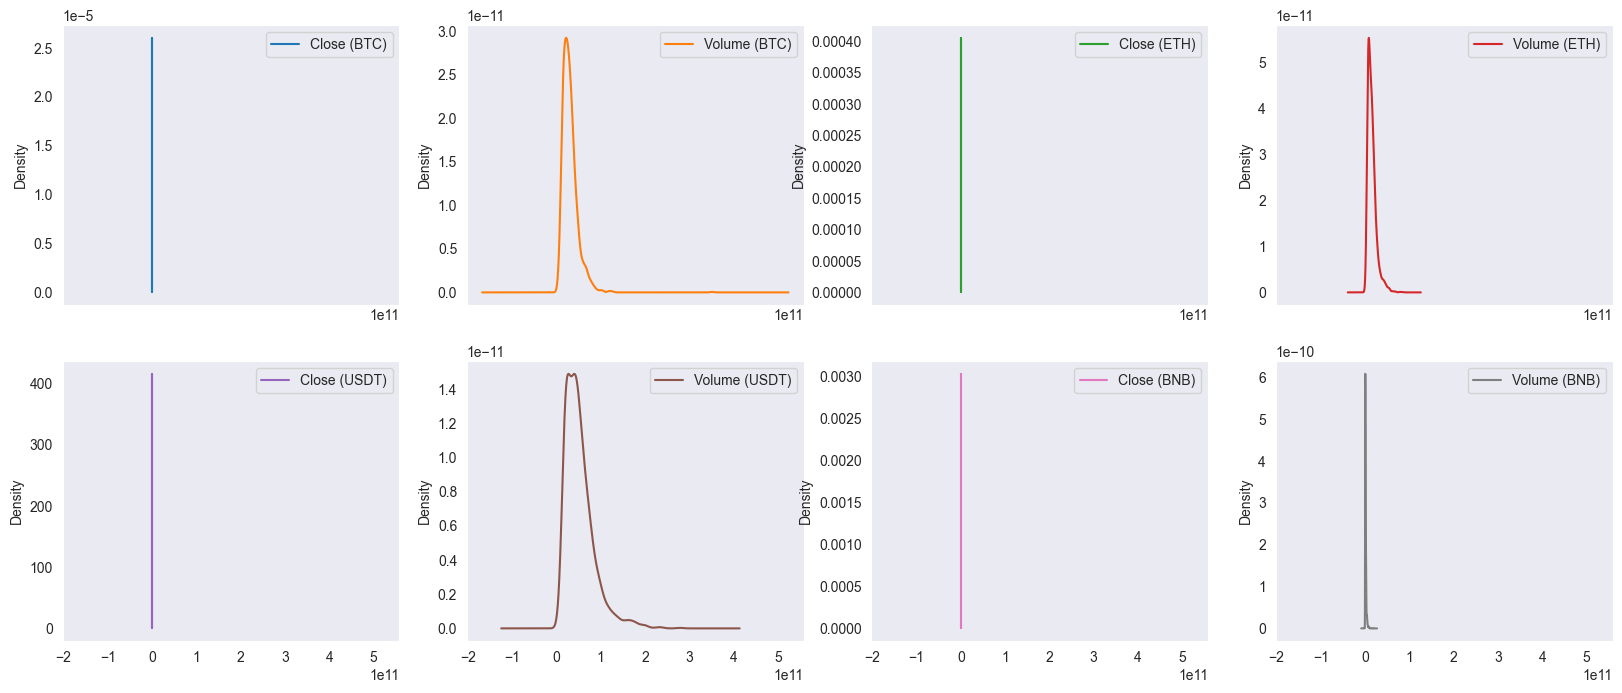

In [17]:
data.plot(kind = "kde", subplots = True, layout = (2, 4), figsize = (20, 8))

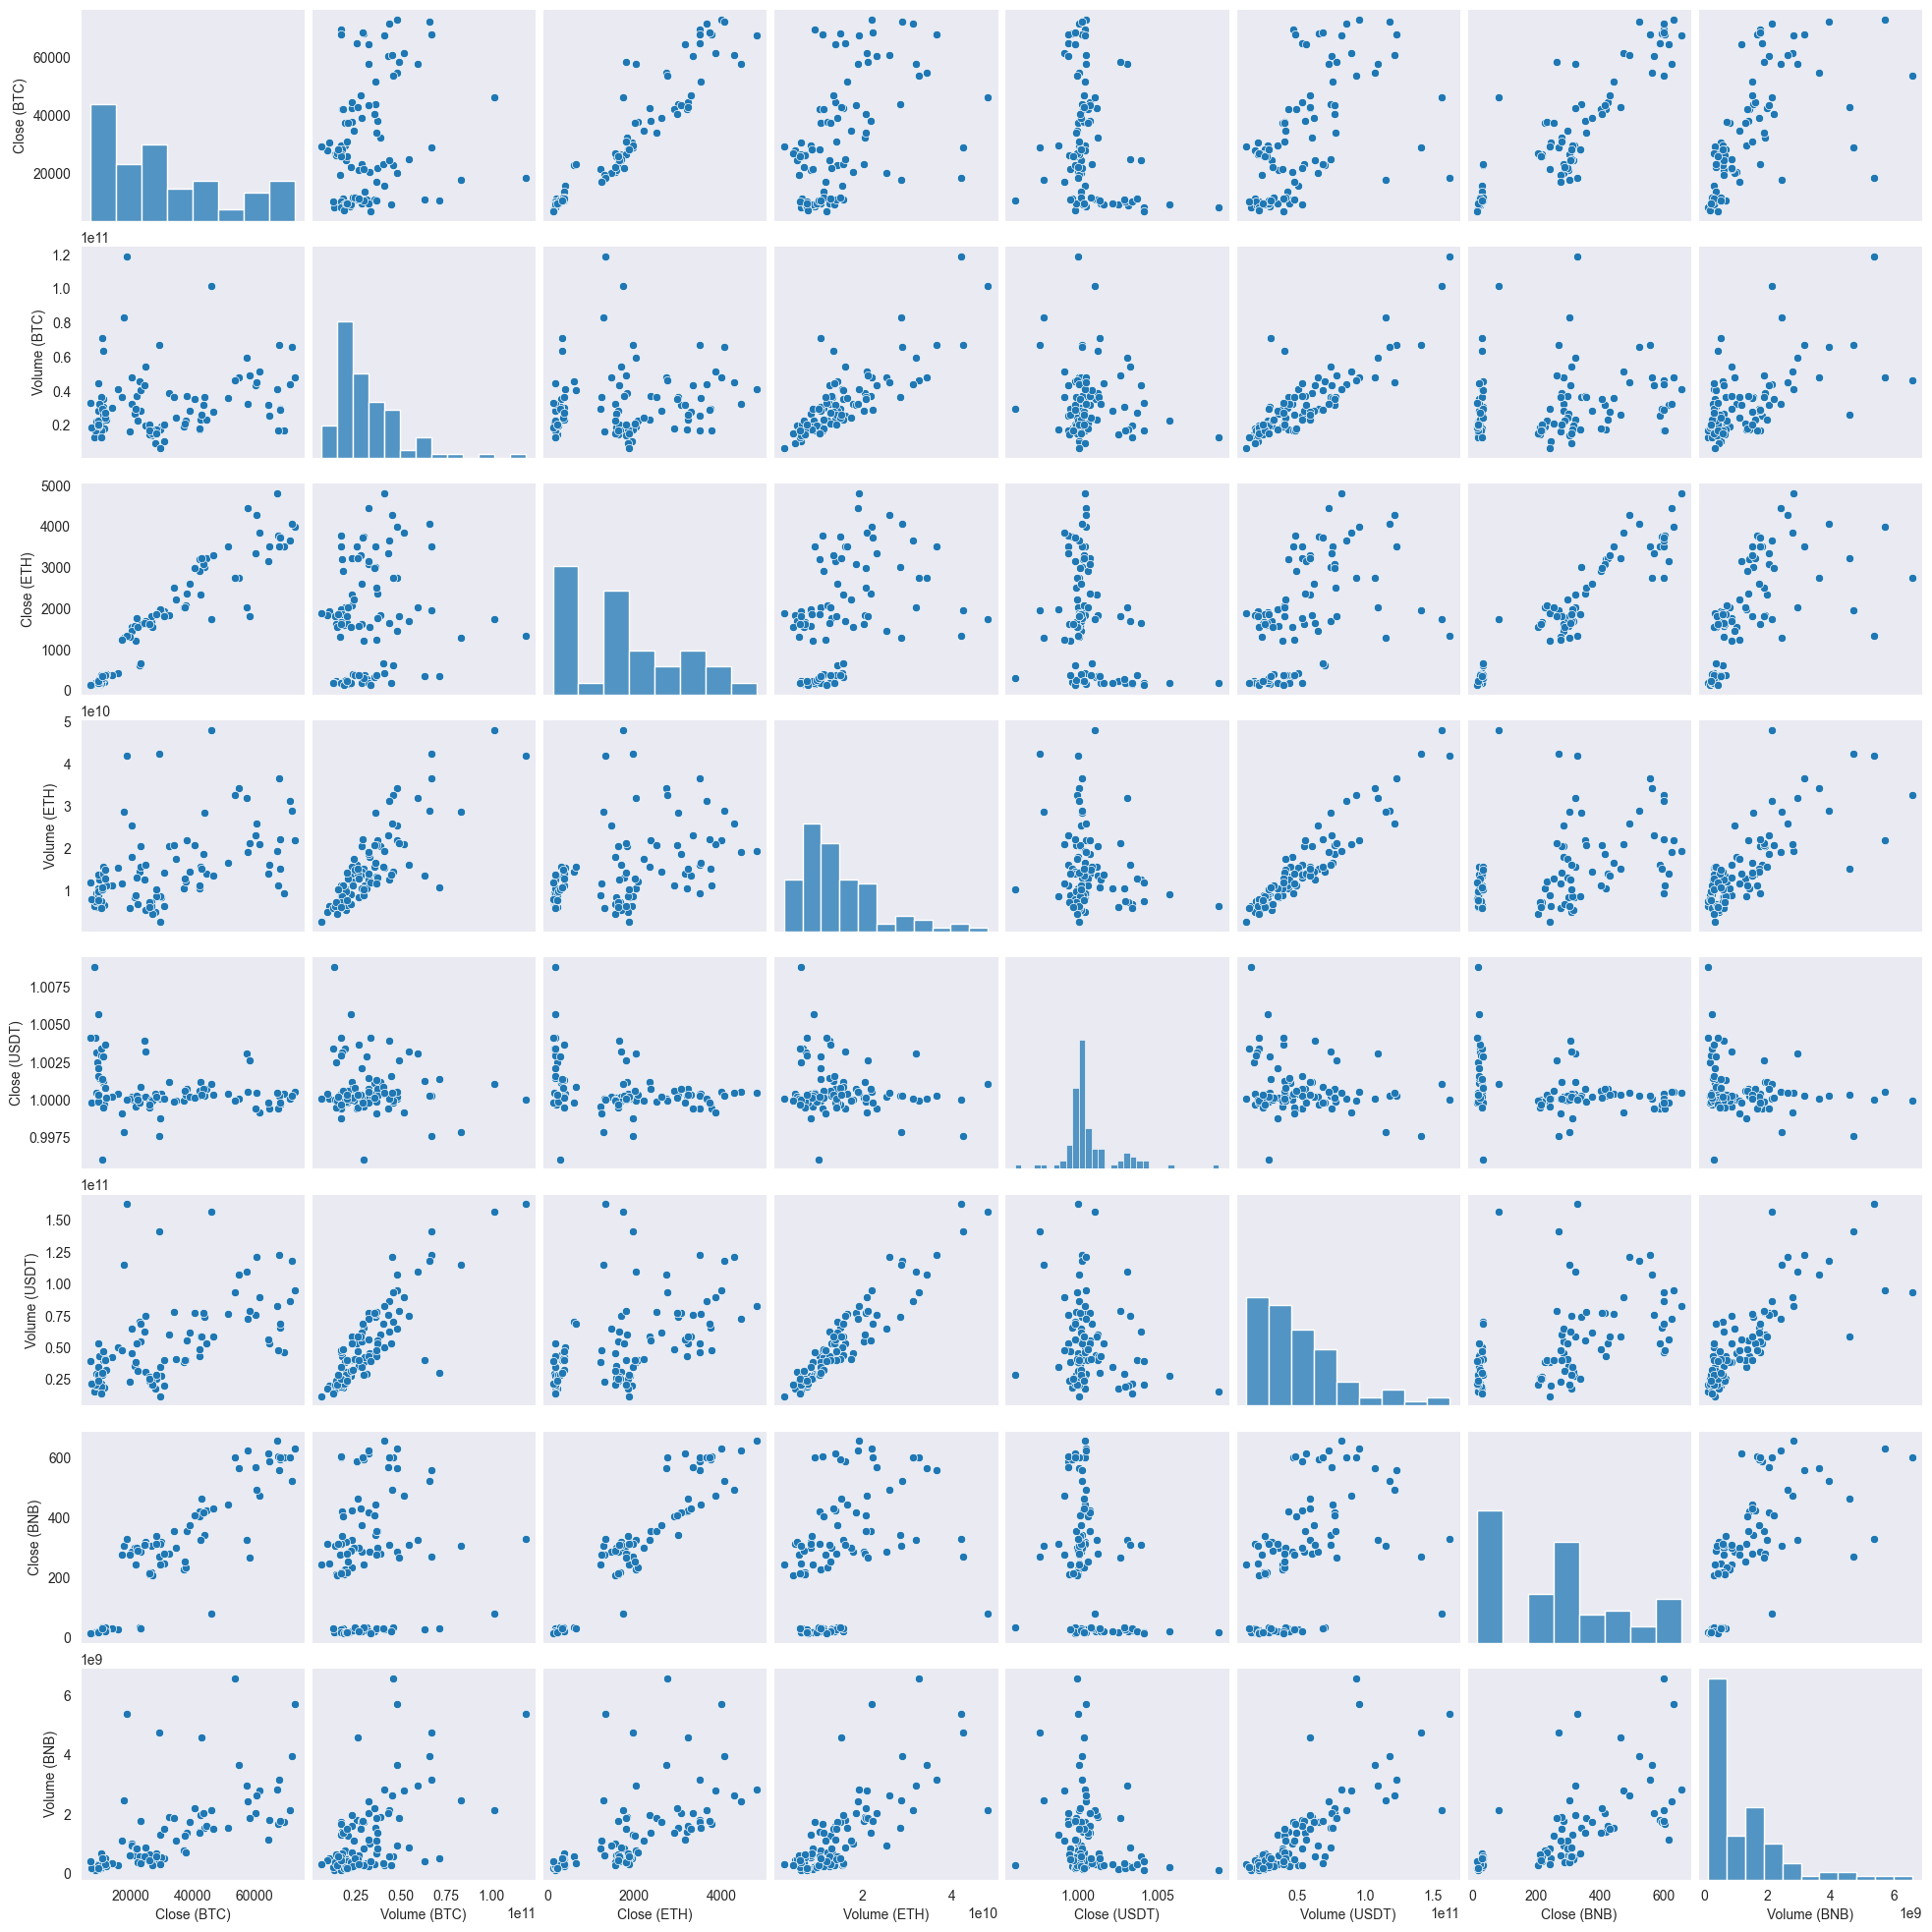

In [18]:
sns.pairplot(data.sample(n=100));

#Data Pre-processing

In [19]:
X = data.drop(columns = ['Close (BTC)'], axis = 1)
Y = data.loc[:, 'Close (BTC)']

In [20]:
X.head()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2019-07-01 00:00:00+00:00,29378589324,293.641113,10292223948,0.996052,28817659770,32.922298,290190904
2019-07-02 00:00:00+00:00,31015895223,291.596436,10618413952,1.002880,29747160959,32.009235,348029977
2019-07-03 00:00:00+00:00,30796494294,303.099976,9926711979,1.005015,27680469385,32.667500,248895676
2019-07-04 00:00:00+00:00,25920294033,284.523224,8403513106,0.999929,24764753311,32.893326,348186707
2019-07-05 00:00:00+00:00,23838480210,287.997528,8723493015,1.001669,22749205293,32.713165,232575484


In [21]:
X.tail()

,Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,
2024-06-27 00:00:00+00:00,21231745045,3444.800537,11771834016,0.998597,45267792573,580.798279,1659378248
2024-06-28 00:00:00+00:00,24952866877,3373.635986,12861158844,0.998137,48868972915,566.464478,1618598501
2024-06-29 00:00:00+00:00,12652903396,3372.967773,6584792001,0.998366,28311234049,569.127686,1375085097
2024-06-30 00:00:00+00:00,17333226409,3432.889160,8396416013,0.998409,34937001727,581.771118,1564676508
2024-07-01 00:00:00+00:00,25001129984,3462.784668,12101794816,0.998711,45938667520,578.835388,1698099584


In [22]:
Y.head()


Date
2019-07-01 00:00:00+00:00    10583.134766
2019-07-02 00:00:00+00:00    10801.677734
2019-07-03 00:00:00+00:00    11961.269531
2019-07-04 00:00:00+00:00    11215.437500
2019-07-05 00:00:00+00:00    10978.459961
Name: Close (BTC), dtype: float64

In [23]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [24]:
# Print the shapes of the resulting datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (1462, 7)
X_test shape: (366, 7)
y_train shape: (1462,)
y_test shape: (366,)


In [25]:
#SelectKBest
#SelectKBest is a feature selection method provided by scikit-learn (sklearn) that selects the top k features based on a specified scoring function.
#This function evaluates each feature independently and selects those that have the strongest relationship with the target variable.

#Parameters
#k: Specifies the number of top features to select. In your case, k=4 indicates that you want to select the top 4 features

from sklearn.feature_selection import SelectKBest

fs = SelectKBest(k=4)
X_train = fs.fit_transform(X_train, Y_train)
X_test = fs.transform(X_test)

c:\Users\A3MAX SOFTWARE TECH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)


In [26]:
mask = fs.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features) 

Selected Features: Index(['Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'], dtype='object')


In [27]:
X_train


array([[1.00045800e+00, 4.68553798e+10, 2.73610039e+01, 2.78060132e+08],
       [1.00002801e+00, 4.11898781e+10, 3.00351074e+02, 8.14318731e+08],
       [9.99984026e-01, 5.36279816e+10, 5.67994812e+02, 1.74546573e+09],
       ...,
       [1.00151706e+00, 5.59052417e+10, 6.50454041e+02, 3.01716787e+09],
       [9.99830008e-01, 2.10101324e+10, 2.33232452e+02, 3.32343168e+08],
       [1.00032794e+00, 5.22673480e+10, 2.83579468e+02, 1.31353152e+09]])

In [28]:
#MinMaxScaler is a preprocessing method in scikit-learn that transforms features by scaling them to a specified range.
# It's often used when your data needs to be normalized within a specific range to ensure all features contribute equally to the analysis.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
# implementation of 10 different regression algorithms using scikit-learn. Each algorithm is trained and evaluated on a sample dataset:

#Import Libraries and Generate Sample Data

from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

----- Linear Regression -----
Mean Squared Error (MSE): 60262516.43019298
R-squared: 0.8104974691687052

----- Ridge Regression -----
Mean Squared Error (MSE): 60753648.13463866
R-squared: 0.8089530480844687

----- Lasso Regression -----
Mean Squared Error (MSE): 60258597.245020874
R-squared: 0.8105097935048416

----- ElasticNet Regression -----
Mean Squared Error (MSE): 255209549.78888512
R-squared: 0.19746372302040005

----- Support Vector Regression (SVR) -----
Mean Squared Error (MSE): 313817478.6023108
R-squared: 0.013164236459962009

----- Decision Tree Regression -----
Mean Squared Error (MSE): 35851053.104570046
R-squared: 0.8872621706039597

----- Random Forest Regression -----
Mean Squared Error (MSE): 22834059.11218263
R-squared: 0.9281956305969657

----- Gradient Boosting Regression -----
Mean Squared Error (MSE): 29339447.89628819
R-squared: 0.9077386747368904

----- K-Nearest Neighbors Regression -----
Mean Squared Error (MSE): 32766322.609601486
R-squared: 0.896962466415

c:\Users\A3MAX SOFTWARE TECH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


----- Neural Network Regression (MLP) -----
Mean Squared Error (MSE): 151225140.33308935
R-squared: 0.5244548599022656

                             Model           MSE  R-squared
0                Linear Regression  6.026252e+07   0.810497
1                 Ridge Regression  6.075365e+07   0.808953
2                 Lasso Regression  6.025860e+07   0.810510
3            ElasticNet Regression  2.552095e+08   0.197464
4  Support Vector Regression (SVR)  3.138175e+08   0.013164
5         Decision Tree Regression  3.585105e+07   0.887262
6         Random Forest Regression  2.283406e+07   0.928196
7     Gradient Boosting Regression  2.933945e+07   0.907739
8   K-Nearest Neighbors Regression  3.276632e+07   0.896962
9  Neural Network Regression (MLP)  1.512251e+08   0.524455


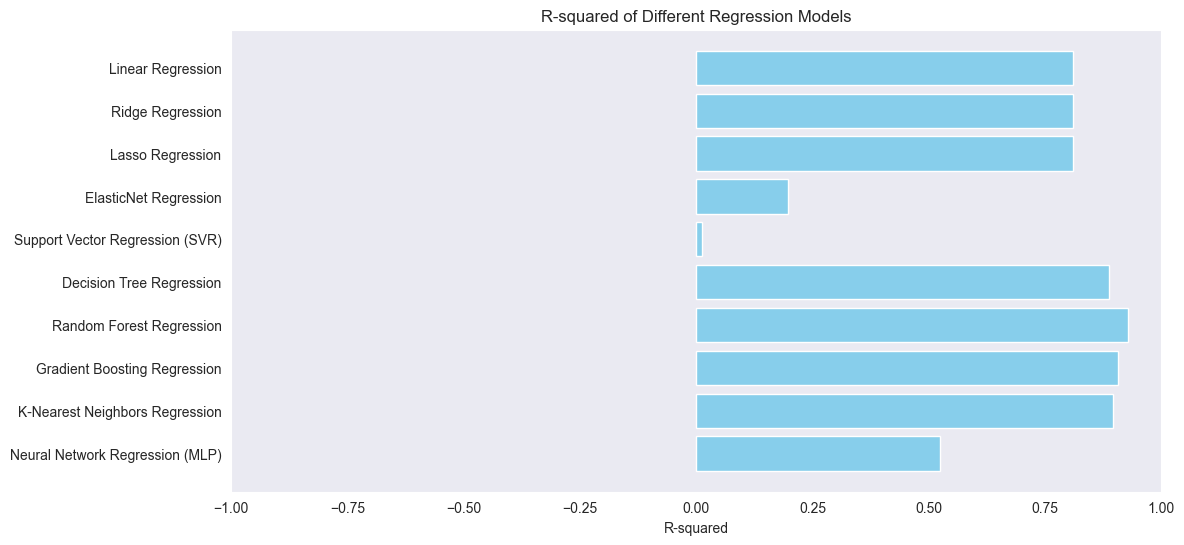

In [33]:

#Define Models and Perform Training and Evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(n_estimators=100),
    'Gradient Boosting Regression': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1),
    'K-Nearest Neighbors Regression': KNeighborsRegressor(n_neighbors=5),
    'Neural Network Regression (MLP)': MLPRegressor(hidden_layer_sizes=(100, 50), activation='relu', solver='adam')
}

# Train and evaluate each model
results = {'Model': [], 'MSE': [], 'R-squared': []}

for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on test set
    Y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)

    # Store results
    results['Model'].append(name)
    results['MSE'].append(mse)
    results['R-squared'].append(r2)

    # Print results
    print(f"----- {name} -----")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared: {r2}")
    print()

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.barh(results_df['Model'], results_df['R-squared'], color='skyblue')
plt.xlabel('R-squared')
plt.title('R-squared of Different Regression Models')
plt.xlim(-1, 1)
plt.gca().invert_yaxis()
plt.show()


#Random Forest Regression is a powerful and versatile algorithm suitable for various regression tasks, offering robust performance and the ability to handle complex data relationships

#Saving the Model


In [34]:
import pickle
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

# Generate sample data
X, Y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=0)


# Scale the features (optional but recommended for some algorithms)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Train the model
model_rf.fit(X_train, Y_train)

# Save the model to a file
filename = 'random_forest_model.pkl'
pickle.dump(model_rf, open(filename, 'wb'))

# Save scaler to a file
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Predict using the loaded model
Y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Loaded Random Forest Regression - Mean Squared Error (MSE): {mse}")
print(f"Loaded Random Forest Regression - R-squared: {r2}")


Loaded Random Forest Regression - Mean Squared Error (MSE): 23513266.553700984
Loaded Random Forest Regression - R-squared: 0.926059783361375
